<a href="https://colab.research.google.com/github/Trishika0611/CODTECH-IT-SOLUTIONS/blob/main/TASK_2_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


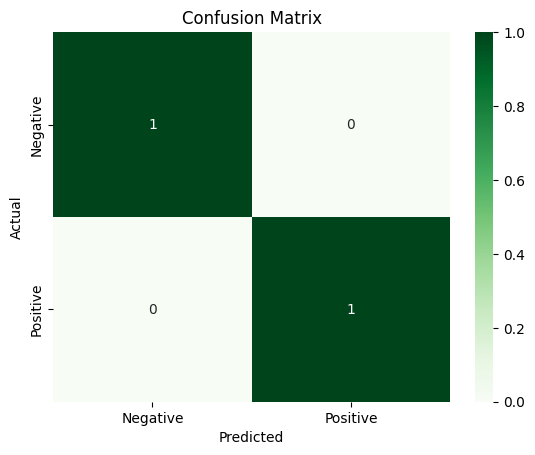


Sample Review: Really impressed with how well this works!
Predicted Sentiment: Positive


In [13]:
#TASK 2: Sentiment Analysis using TF-IDF and Logistic Regression
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

data = {
    'review': [
        "I absolutely loved this product! Highly recommended.",
        "Worst purchase ever. Completely waste of money.",
        "Amazing quality and great customer service.",
        "Terrible! It broke after one use.",
        "Fantastic experience. Will definitely buy again.",
        "Not good. The product is defective.",
        "Really impressed with how well this works!",
        "Bad packaging and late delivery.",
        "Everything works perfectly fine, loved it.",
        "Awful experience. I want a refund."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Text preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_review'] = df['review'].apply(clean_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization with n-grams (captures context)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression with tuning
model = LogisticRegression(C=3, max_iter=2000, solver='lbfgs')
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example test
sample = ["Really impressed with how well this works!"]
sample_clean = [clean_text(s) for s in sample]
sample_tfidf = vectorizer.transform(sample_clean)
pred = model.predict(sample_tfidf)
print("\nSample Review:", sample[0])
print("Predicted Sentiment:", "Positive" if pred[0] == 1 else "Negative")
